__________________________________________________
# Netflix Stock Price Prediction
_____________________________________________

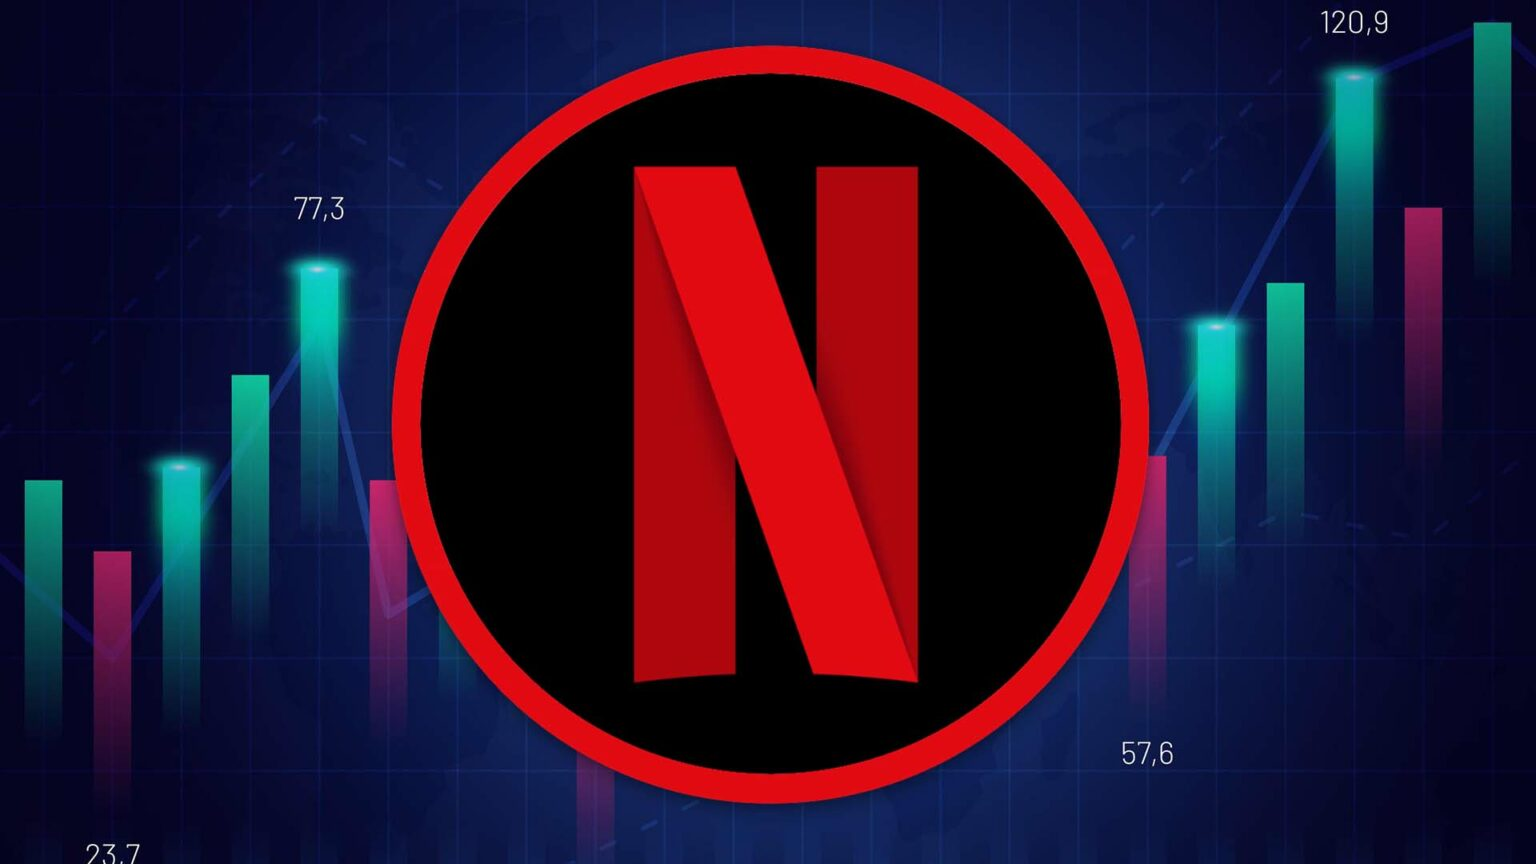

_____________________________________
# Dataset Description
___________________________________
The Dataset contains data for 5 years ie. from 5th Feb 2018 to 5th Feb 2022

The art of forecasting stock prices has been a difficult task for many of the researchers and analysts. In fact, investors are highly interested in the research area of stock price prediction. For a good and successful investment, many investors are keen on knowing the future situation of the stock market. Good and effective prediction systems for the stock market help traders, investors, and analyst by providing supportive information like the future direction of the stock market.
#### 1. inputs data is the last 60 data of train data plus true test data
#### 2. inputs data is the last 60 data of train data only (not use true test data)

# Importing Necessary Libraries

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style('darkgrid')


# Agenda

* Load The Dataset 
* EDA and Preprocessing
* Visualisations
* Model Building:-As its a Price Prediction topic ,Generally we Prefer Linear models and LSTM(we will Try Both Aspects)
* Model Evaluation
* Conclusion

In [3]:
df=pd.read_csv('NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


**Observations**

* The Dataset Contains 1009 rows and 7 Columns
* It has 1 Categorical Column (Date) and rest Numerical Columns
* The Dataset Doesnt Contain Null Values

In [29]:
df1=df.copy()

# Statistical Analysis

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


**Observations**

* The Average Open,High,Low,Close are almost between 412-425
* The Max High 700 and min 250 
* By Observing the Report ,there is no any Kind of Indication of Presence of Outliers

# Univariate ,Bivariate ,Multivariate Analysis

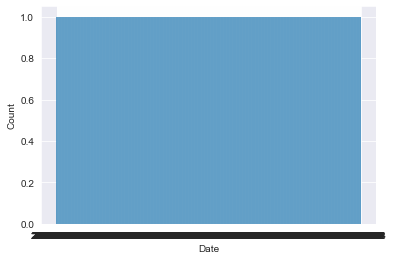

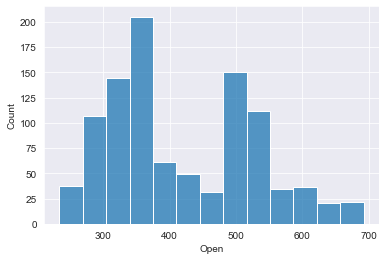

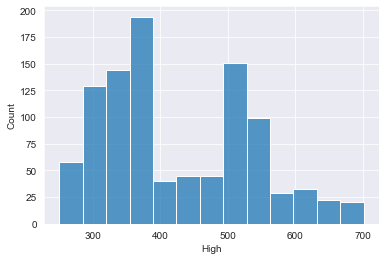

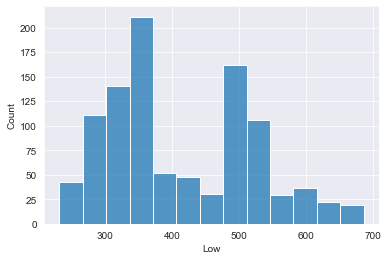

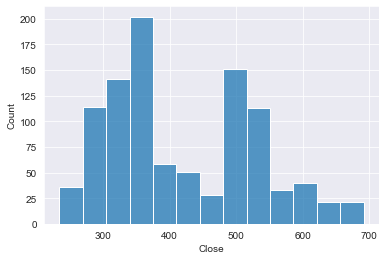

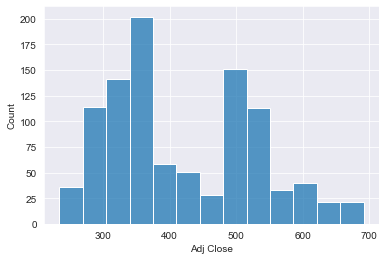

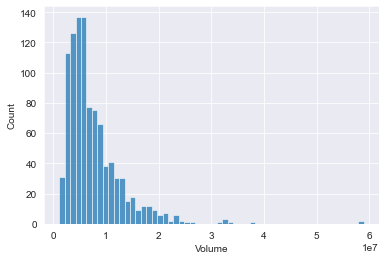

In [10]:
# Distribution of COlumns
for i in df.columns:
    sns.histplot(df[i])
    plt.show()

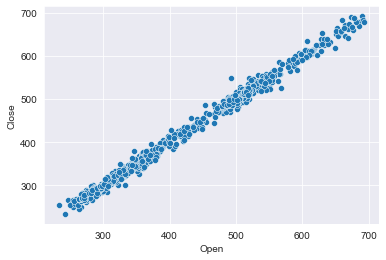

In [13]:
# Scatter plots

sns.scatterplot(x=df['Open'],y=df['Close'])
plt.show()

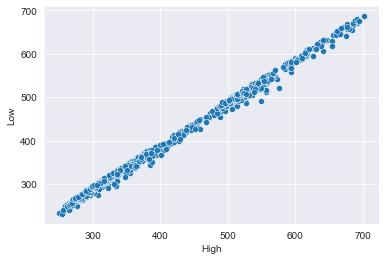

In [15]:
sns.scatterplot(x=df.High,y=df['Low'])
plt.show()

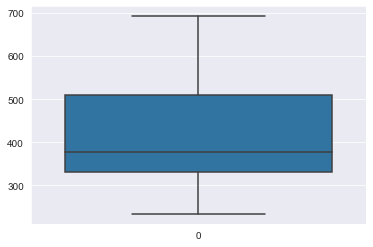

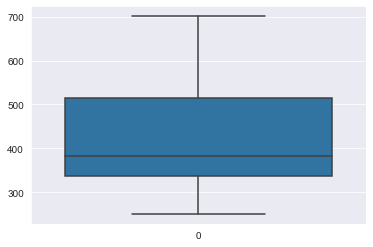

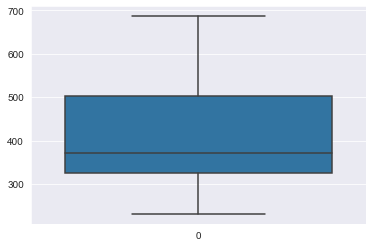

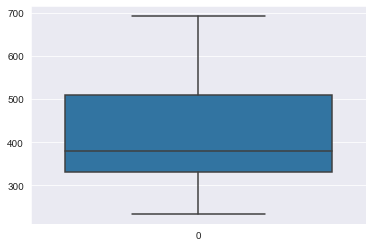

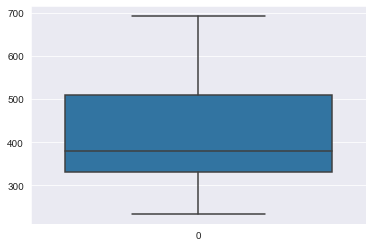

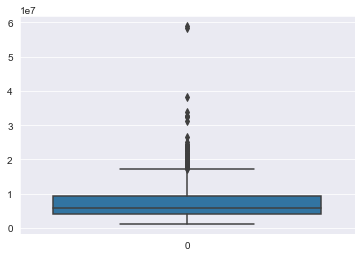

In [19]:
for i in df.select_dtypes(include=np.number):
    sns.boxplot(df[i])
    plt.show()

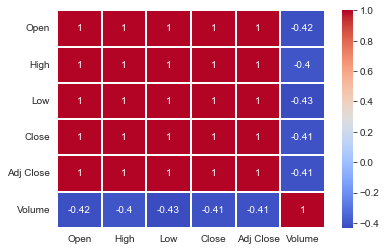

In [17]:
# Correlation Matrix
sns.heatmap(df.corr(),annot=True,linewidths=0.1,cmap='coolwarm')
plt.show()

**Observations of Plots**

* Almost all Features Follow Gaussian Distribution
* By Observing the Boxplots we Can Observe There is no Presence of Outliers
* They Follow Linearity ie Each Column with Respect to Other Column are Linearly Dependant (which Obeys the Assumption)
* There is no any Kind of Correlation Observed

# Model Building

In [21]:
train, test = train_test_split(df, test_size = 0.2)
test_pred = test.copy()

In [22]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [23]:
y_train = train['Close'].values
y_test = test['Close'].values

### Linear Regression

In [24]:
linear_mod = LinearRegression(fit_intercept=True)
linear_mod .fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred = linear_mod .predict(x_test)

In [26]:
result = linear_mod .predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[257.81623273]


In [27]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 19.846
RMSE 4.455
MAE 3.272
MAPE 0.008
R2 Score :  0.998


In [30]:
### Visualisation
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

In [31]:
df1['Date']=pd.to_datetime(df1['Date'],format='%Y-%m-%d')

In [32]:
data = pd.DataFrame(df1[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


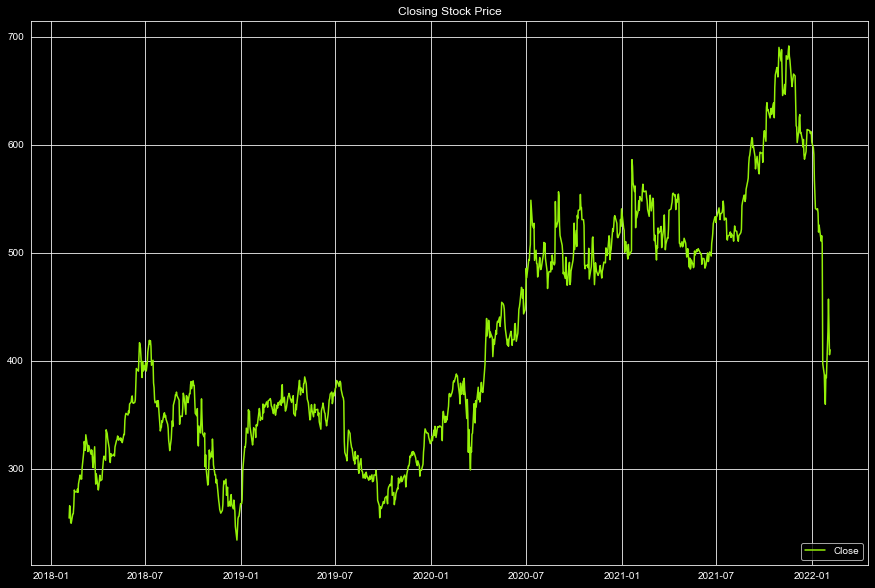

In [34]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(df1.Date, df1.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


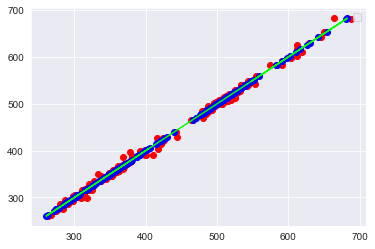

In [62]:
plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')
plt.legend()
plt.show()

###  Lets Try Different Linear model

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
GB_mod = GradientBoostingRegressor()
GB_mod .fit(x_train, y_train)

GradientBoostingRegressor()

In [39]:
y_pred = GB_mod.predict(x_test)

In [40]:
result = linear_mod .predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[257.81623273]


In [41]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 34.474
RMSE 5.871
MAE 4.335
MAPE 0.011
R2 Score :  0.997


In [ ]:
# By Comparing Both Linear models RMSE Linear Regression model works Better

# LSTM
Long short-term memory (LSTM): Many experts currently consider LSTM as the most promising algorithm for stock prediction. It’s a type of RNN, but it can process both individual data points and more complex sequences of data, making it well-suited to handle non-linear time series data and predict highly volatile price fluctuations.

In [42]:
dataset_train=df.iloc[-1000:-100]
dataset_test=df1.iloc[-100:]
print(dataset_train.columns.tolist())
print(dataset_test.columns.tolist())

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [43]:
trainset = dataset_train.iloc[:,1:2].values #Open
display(trainset[0:5])

array([[278.730011],
       [277.73999 ],
       [282.070007],
       [283.880005],
       [281.      ]])

In [44]:
# Scale the dataset

In [45]:
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)
print(training_scaled[0:5])
print(len(training_scaled))

[[0.1202792 ]
 [0.11762178]
 [0.12924443]
 [0.13410283]
 [0.12637231]]
900


In [46]:
x_train = []
y_train = []

# x_train is data during the past 60 days.
# y_data is the data of the day after the last day of x_train

In [47]:
for i in range(60,len(training_scaled)):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
print(x_train.shape,y_train.shape)

(840, 60) (840,)


This code is reshaping the input data x_train into a 3D tensor with dimensions (samples, time steps, features) which is required as input for a Long Short-Term Memory (LSTM) neural network.

The reshaping step is necessary because LSTMs require input data to be in a specific format, where:

samples refers to the number of input sequences (or samples) in the dataset
time steps refers to the number of time steps in each input sequence
features refers to the number of features (or variables) in each time step of the input sequence

In [48]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print('(samples, time steps, features) =',x_train.shape)

(samples, time steps, features) = (840, 60, 1)


In [49]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [50]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

regressor.fit(x_train,y_train,epochs =300, batch_size = 32)

Epoch 1/300
27/27 [==============================] - 12s 92ms/step - loss: 0.0429
Epoch 2/300
27/27 [==============================] - 3s 100ms/step - loss: 0.0097
Epoch 3/300
27/27 [==============================] - 3s 102ms/step - loss: 0.0087
Epoch 4/300
27/27 [==============================] - 3s 118ms/step - loss: 0.0078
Epoch 5/300
27/27 [==============================] - 4s 163ms/step - loss: 0.0084
Epoch 6/300
27/27 [==============================] - 4s 127ms/step - loss: 0.0080
Epoch 7/300
27/27 [==============================] - 3s 110ms/step - loss: 0.0075
Epoch 8/300
27/27 [==============================] - 3s 112ms/step - loss: 0.0076
Epoch 9/300
27/27 [==============================] - 3s 105ms/step - loss: 0.0079
Epoch 10/300
27/27 [==============================] - 3s 118ms/step - loss: 0.0081
Epoch 11/300
27/27 [==============================] - 3s 124ms/step - loss: 0.0071
Epoch 12/300
27/27 [==============================] - 3s 127ms/step - loss: 0.0066
Epoch 13/300


27/27 [==============================] - 3s 101ms/step - loss: 0.0021
Epoch 101/300
27/27 [==============================] - 3s 101ms/step - loss: 0.0023
Epoch 102/300
27/27 [==============================] - 3s 100ms/step - loss: 0.0020
Epoch 103/300
27/27 [==============================] - 3s 100ms/step - loss: 0.0020
Epoch 104/300
27/27 [==============================] - 3s 100ms/step - loss: 0.0019
Epoch 105/300
27/27 [==============================] - 3s 101ms/step - loss: 0.0020
Epoch 106/300
27/27 [==============================] - 3s 100ms/step - loss: 0.0021
Epoch 107/300
27/27 [==============================] - 3s 109ms/step - loss: 0.0025
Epoch 108/300
27/27 [==============================] - 3s 101ms/step - loss: 0.0023
Epoch 109/300
27/27 [==============================] - 3s 100ms/step - loss: 0.0022
Epoch 110/300
27/27 [==============================] - 3s 100ms/step - loss: 0.0018
Epoch 111/300
27/27 [==============================] - 3s 100ms/step - loss: 0.0019
Epoch 

27/27 [==============================] - 3s 105ms/step - loss: 0.0016
Epoch 198/300
27/27 [==============================] - 3s 105ms/step - loss: 0.0015
Epoch 199/300
27/27 [==============================] - 3s 103ms/step - loss: 0.0017
Epoch 200/300
27/27 [==============================] - 3s 101ms/step - loss: 0.0015
Epoch 201/300
27/27 [==============================] - 3s 101ms/step - loss: 0.0015
Epoch 202/300
27/27 [==============================] - 3s 104ms/step - loss: 0.0014
Epoch 203/300
27/27 [==============================] - 3s 108ms/step - loss: 0.0017
Epoch 204/300
27/27 [==============================] - 3s 110ms/step - loss: 0.0017
Epoch 205/300
27/27 [==============================] - 3s 104ms/step - loss: 0.0016
Epoch 206/300
27/27 [==============================] - 3s 106ms/step - loss: 0.0014
Epoch 207/300
27/27 [==============================] - 3s 104ms/step - loss: 0.0014
Epoch 208/300
27/27 [==============================] - 3s 106ms/step - loss: 0.0016
Epoch 

27/27 [==============================] - 3s 102ms/step - loss: 0.0014
Epoch 295/300
27/27 [==============================] - 3s 105ms/step - loss: 0.0014
Epoch 296/300
27/27 [==============================] - 3s 104ms/step - loss: 0.0014
Epoch 297/300
27/27 [==============================] - 3s 103ms/step - loss: 0.0015
Epoch 298/300
27/27 [==============================] - 3s 104ms/step - loss: 0.0013
Epoch 299/300
27/27 [==============================] - 3s 105ms/step - loss: 0.0015
Epoch 300/300
27/27 [==============================] - 3s 102ms/step - loss: 0.0014


In [51]:
# dataset_test
real_stock_price = dataset_test.iloc[:,1:2].values

dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)

In [52]:
# 1. inputs data is the last 60 data of train data plus true test data
print(len(dataset_total),len(dataset_test))
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
print(inputs.shape)

1000 100
(160,)


In the context of a LSTM model, this reshaping may be necessary if the input data has only one feature (i.e., one time series) and the LSTM model expects a 3D input shape of (n_samples, n_time_steps, n_features). In this case, since there is only one feature, the shape does not change.

In [53]:
inputs = inputs.reshape(-1,1)
print(inputs.shape)

#sc = MinMaxScaler(feature_range = (0,1))
inputs = sc.transform(inputs)
print(inputs.shape)

(160, 1)
(160, 1)


In [54]:
x_test = []
for i in range(60,len(inputs)):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
print(x_test.shape)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)

(100, 60)
(100, 60, 1)


In [55]:
predicted_price = regressor.predict(x_test)

4/4 [==============================] - 2s 25ms/step


In [56]:
predicted_price = sc.inverse_transform(predicted_price)
print(predicted_price.shape)

(100, 1)


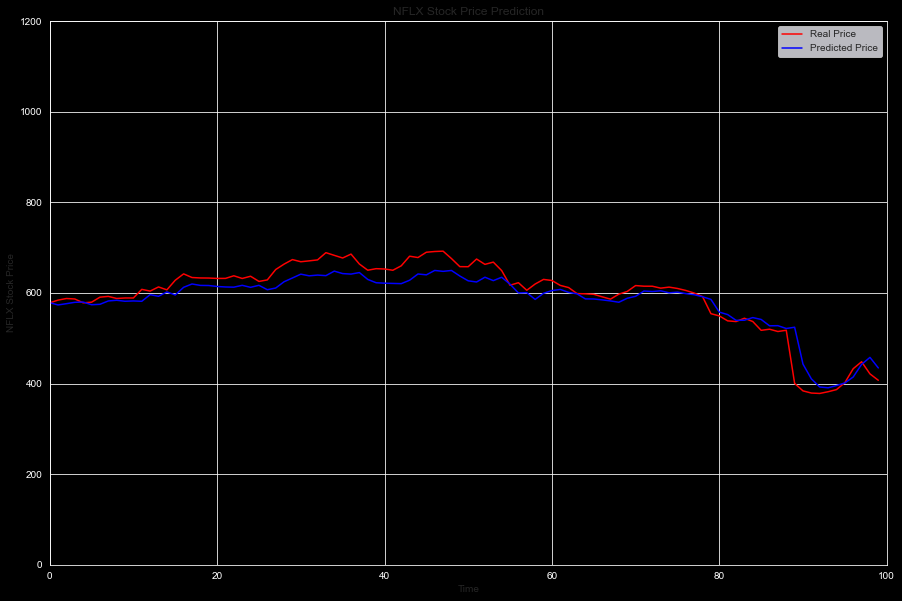

In [57]:
style()
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('NFLX Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NFLX Stock Price')
plt.xlim(0,100)  
plt.ylim(0,1200) 
plt.legend()
plt.show()

In [58]:
inputs = np.array(dataset_train['Open'][-60:])
new_predicted_price=[]
for i in range(100):
    x = np.reshape(inputs, (1,60,1))
    pred = regressor.predict(x)
    inputs = np.append(inputs, pred)
    inputs = inputs[1:]
    new_predicted_price+=[pred.reshape(-1)]

1/1 [==============================] - 0s 29ms/step


In [59]:
new_predicted_price = sc.inverse_transform(np.array(new_predicted_price))
print(new_predicted_price.shape)

(100, 1)


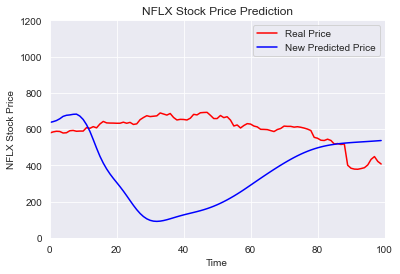

In [60]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(new_predicted_price, color = 'blue', label = 'New Predicted Price')
plt.title('NFLX Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NFLX Stock Price')
plt.xlim(0,100)  
plt.ylim(0,1200) 
plt.legend()
plt.show()

____________________________
# THANK YOU
_________________________________